## PRML  5.1 Neural netowrks

###Overview
Figures 5.3 illustrate the capability of a multilayer perceptron to approximate four different functions comparising (a) $f_(x) = x^2$,(b)$f_(x) = sin(x)$, (c)$f_(x) = |x|$, (d)$f_(x) = H(x)$ where$H(x)$ is the Heaviside step function. In each case, $N = 50$ data points, shown as blue dots, have been sampled uniformly in $x$ and correspponding values of $f(x)$. There data points are then used to traini a tow layer network having three hidden units with "tanh" activation function.s and linear output units.  

###Procedure

①Overall netowrk function is (5.9),

\begin{equation*}
 y_k({\bf x}, {\bf w}) = \sigma(\sum_{j=0}^M, w^{(2)}_{kj} h(\sum_{i=0}^D w^{(1)}_{ji} x_i)) (5.9)
\end{equation*}

here $h()$ is tanh().

②To obtain weight vector${\bf w}$、differences between output of each node and actual value are calculated.Output of hidden unit is (5.63)、output of output unit is (5.64).

\begin{equation*}
 z_j = {\rm tanh} (\sigma(\sum_{i=0}^D, w^{(1)}_{ji} x_i)) (5.63)
\end{equation*}


\begin{equation*}
 y_k = \sum_{j=0}^M, w^{(2)}_{kj} z_i (5.64)
\end{equation*}


③The error $\delta_k$ for each output unit is computed.

\begin{equation*}
\delta_k = y_k - t_k (5.65)
\end{equation*}

④The error $\delta_j$ for the each hidden units is obtained(Backpropagation).

\begin{equation*}
\delta_j = (1-{z_j}^2) \sum_{k=1}^K w_{kj} \delta_k (5.65)
\end{equation*}

⑤The weights for the firs layer and second layer are given by (5.43),(5.67).

\begin{equation*}
{\bf w}^{\rm \tau+1} = {\bf w}^{\rm \tau} - \mu \nabla  E({\bf{w}})(5.43)
\end{equation*}

\begin{equation*}
\frac{\partial E_n}{\partial w_{ji}^{(1)}} = \delta_j x_i(5.67)
\end{equation*}

\begin{equation*}
\frac{\partial E_n}{\partial w_{kj}^{(2)}} = \delta_k z_j(5.43)
\end{equation*}

In [1]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import random
%matplotlib inline

In [2]:
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

def NN(x_train, t, n_imput, n_hidden, n_output, eta, W1, W2, n_loop):
    for n in xrange(n_loop):
        for n in range(len(x_train)):
            x = np.array([x_train[n]])
            
            #feedforward
            X = np.insert(x, 0, 1) #Insert fixed term

            A = np.dot(W1, X) #(5.62)
            Z = np.tanh(A)  #(5.63)
            Z[0] = 1.0
            Y = np.dot(W2, Z) #(5.64)

   
            #Backprobagation
            D2 = Y - t[n]#(5.65)
            D1 = (1-Z**2)*W2*D2 #(5.66)
    
            W1 = W1- eta*D1.T*X #(5.67), (5.43)
            W2 = W2- eta*D2.T*Z #(5.67), (5.43)
    return  W1, W2

def output(x, W1, W2):
    X = np.insert(x, 0, 1) #Insert fixed term
            
    A = np.dot(W1, X) #(5.62)
    Z = np.tanh(A)  #(5.63)
    Z[0] = 1.0 #Insert fixed term
    Y = np.dot(W2, Z) #(5.64)
    return Y, Z

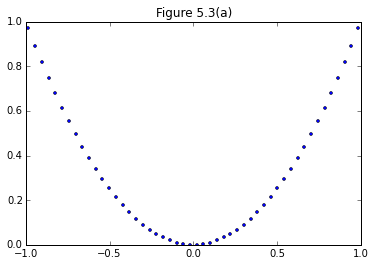

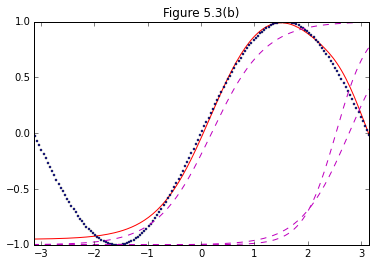

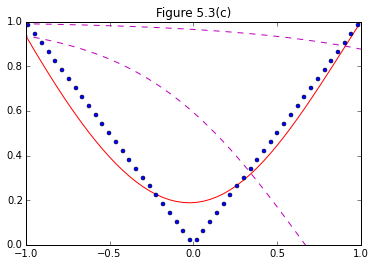

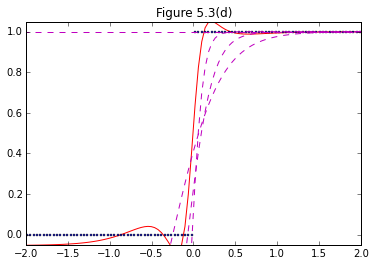

In [3]:
if __name__ == "__main__":
    #Set form of nueral network 
    n_imput = 2
    n_hidden = 4
    n_output = 1
    eta = 0.1
    W1 = np.random.random((n_hidden, n_imput))
    W2 = np.random.random((n_output, n_hidden))
    n_loop = 1000
    
    
    #Set train data
    x_train = np.linspace(-4, 4, 200).reshape(200, 1)
    y_train_1 = x_train * x_train
    y_train_2 = np.sin(x_train)
    y_train_3 = np.abs(x_train)
    y_train_4 = heaviside(x_train)

    
    W1_1, W2_1= NN(x_train, y_train_1, n_imput, n_hidden, n_output, eta, W1, W2, n_loop) 
    W1_2, W2_2= NN(x_train, y_train_2, n_imput, n_hidden, n_output, eta, W1, W2, n_loop)
    W1_3, W2_3= NN(x_train, y_train_3, n_imput, n_hidden, n_output, eta, W1, W2, n_loop)
    W1_4, W2_4= NN(x_train, y_train_4, n_imput, n_hidden, n_output, eta, W1, W2, n_loop)

    Y_1 = np.zeros((len(x_train), n_output))
    Z_1 = np.zeros((len(x_train), n_hidden))

    Y_2 = np.zeros((len(x_train), n_output))
    Z_2 = np.zeros((len(x_train), n_hidden))

    Y_3 = np.zeros((len(x_train), n_output))
    Z_3 = np.zeros((len(x_train), n_hidden))

    Y_4 = np.zeros((len(x_train), n_output))
    Z_4 = np.zeros((len(x_train), n_hidden))

    for n in range(len(x_train)):
        Y_1[n], Z_1[n] =output(x_train[n], W1_1, W2_1)
        Y_2[n], Z_2[n] =output(x_train[n], W1_2, W2_2)
        Y_3[n], Z_3[n] =output(x_train[n], W1_3, W2_3)
        Y_4[n], Z_4[n] =output(x_train[n], W1_4, W2_4)
    
    
    plt.plot(x_train, Y_1, "r-")
    plt.plot(x_train, y_train_1, "bo", markersize=3)
    for i in range(n_hidden):
        plt.plot(x_train, Z_1[:,i], 'm--')
    xlim([-1,1])
    ylim([0, 1])
    title("Figure 5.3(a)")
    show()
    
    plt.plot(x_train, Y_2, "r-")
    plt.plot(x_train, y_train_2, "bo", markersize=2)
    for i in range(n_hidden):
        plt.plot(x_train, Z_2[:,i], 'm--')
    xlim([-3.14,3.14])
    ylim([-1, 1])
    title("Figure 5.3(b)")
    show()
    
    
    plt.plot(x_train, Y_3, "r-")
    plt.plot(x_train, y_train_3, "bo", markersize=4)
    for i in range(n_hidden):
        plt.plot(x_train, Z_3[:,i], 'm--')
    xlim([-1,1])
    ylim([0, 1])
    title("Figure 5.3(c)")
    show()
    
    
    plt.plot(x_train, Y_4, "r-")
    plt.plot(x_train, y_train_4, "bo" ,markersize=2)
    for i in range(n_hidden):
        plt.plot(x_train, Z_4[:,i], 'm--')
    xlim([-2,2])
    ylim([-0.05, 1.05])
    title("Figure 5.3(d)")
    show()

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer